## Sklearn ile C to F ilişikisini Bulalım.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Veri Türetelim

In [2]:
#F = 1.8C + 32
exMetin = """
25	77
20	68
12	53.6
45	113
78	172.4
18	64.4
16	60.8
8	46.4
23	73.4
55	131
34.13333333	93.44
34.88484848	94.79272727
35.63636364	96.14545455
36.38787879	97.49818182
37.13939394	98.85090909
37.89090909	100.2036364
38.64242424	101.5563636
"""

In [3]:
veri = np.array([s.split("\t") for s in exMetin.splitlines() if s])
veri.shape

veri = veri.astype(float)
veri

array([[ 25.        ,  77.        ],
       [ 20.        ,  68.        ],
       [ 12.        ,  53.6       ],
       [ 45.        , 113.        ],
       [ 78.        , 172.4       ],
       [ 18.        ,  64.4       ],
       [ 16.        ,  60.8       ],
       [  8.        ,  46.4       ],
       [ 23.        ,  73.4       ],
       [ 55.        , 131.        ],
       [ 34.13333333,  93.44      ],
       [ 34.88484848,  94.79272727],
       [ 35.63636364,  96.14545455],
       [ 36.38787879,  97.49818182],
       [ 37.13939394,  98.85090909],
       [ 37.89090909, 100.2036364 ],
       [ 38.64242424, 101.5563636 ]])

### Train ve Test olarak ayıralım

In [4]:
# y = f(X) = mx + b
X = veri[:,0]
X = X[:, np.newaxis]#algoritma 2 boyut istiyordu.

#
y = veri[:,1]
y

#train ve test olarak
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size=0.2)

#### Modeli eğitelim

In [5]:
%%time

model = LinearRegression() #estimator

#
model.fit(X_train, y_train) #eğitim

CPU times: user 940 µs, sys: 0 ns, total: 940 µs
Wall time: 748 µs


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
print(f"y = {model.coef_}x + {model.intercept_}")

y = [1.8]x + 32.00000000124479


### Tahmin Edelim

In [9]:
y_test_predict = model.predict(X_test)

In [13]:
pd.DataFrame(zip(y_test, y_test_predict), columns=["y_test","y_test_predict"])

,y_test,y_test_predict
0,113.000000,113.000000
1,97.498182,97.498182
2,46.400000,46.400000
3,53.600000,53.600000


### Evaluate

In [14]:
mean_squared_error(y_test, y_test_predict)

3.3359428066682095e-18

### Görselleştirelim

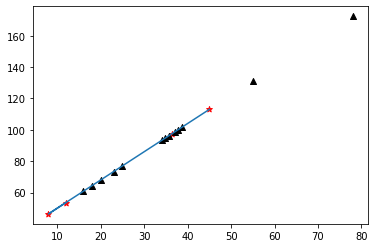

In [22]:
plt.scatter(X_test, y_test, color="red", marker="*")
plt.scatter(X_train,y_train,color="black", marker="^")

plt.plot(X_test, y_test_predict)

plt.show()

### Eğittiğimiz modeli kaydedelim

In [25]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [26]:
#import pickle ile pickle (dumps ve loads) formata çevirilebilir. böylece db ye basabilirz.

In [27]:
import joblib

joblib.dump(value=model, filename="model_v1.pkl")

['model_v1.pkl']

In [28]:
#
modelLR =joblib.load("model_v1.pkl")

modelLR.predict(X_test[:5])

array([113.        ,  97.49818182,  46.4       ,  53.6       ])